In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import math

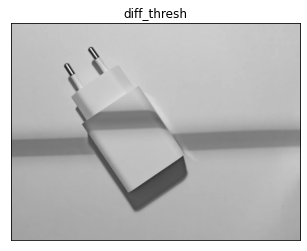

In [2]:
frame = cv2.imread('../imgs/charger_1.jpg')
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(frame_gray, cmap='gray', vmin=0)
plt.title('diff_thresh'), plt.xticks([]), plt.yticks([])
plt.show()

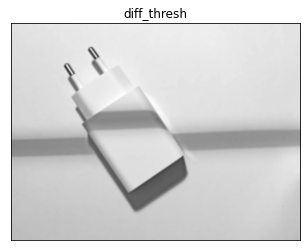

In [3]:
kernel = 11
frame_gray = cv2.GaussianBlur(frame_gray,(kernel,kernel),0)
plt.imshow(frame_gray, cmap='gray', vmin=0)
plt.title('diff_thresh'), plt.xticks([]), plt.yticks([])
plt.show()

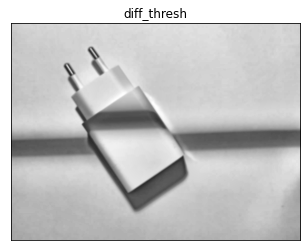

In [4]:
kernel_size = 7
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(kernel_size,kernel_size))
cl1 = clahe.apply(frame_gray)
plt.imshow(cl1, cmap='gray', vmin=0)
plt.title('diff_thresh'), plt.xticks([]), plt.yticks([])
plt.show()

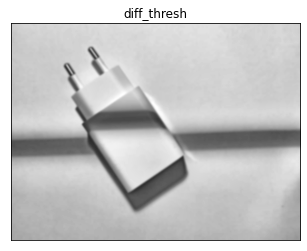

In [5]:
kernel = 11
blur = cv2.GaussianBlur(cl1,(kernel,kernel),0)
plt.imshow(blur, cmap='gray', vmin=0)
plt.title('diff_thresh'), plt.xticks([]), plt.yticks([])
plt.show()

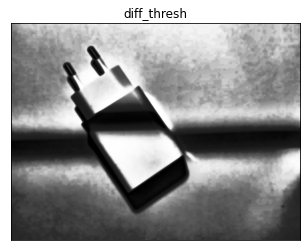

In [6]:
dst = cv2.equalizeHist(blur)
plt.imshow(dst, cmap='gray', vmin=0)
plt.title('diff_thresh'), plt.xticks([]), plt.yticks([])
plt.show()

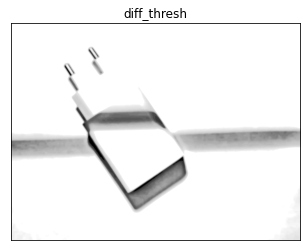

In [7]:
lookUpTable = np.empty((1,256), np.uint8)
gamma = 0.4
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 127)
res = cv2.LUT(dst, lookUpTable)

plt.imshow(res, cmap='gray', vmin=0)
plt.title('diff_thresh'), plt.xticks([]), plt.yticks([])
plt.show()

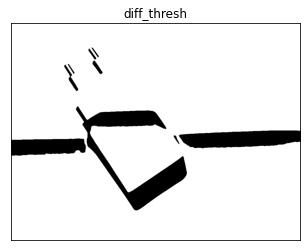

In [8]:
ret, thresh = cv2.threshold(res,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray', vmin=0)
plt.title('diff_thresh'), plt.xticks([]), plt.yticks([])
plt.show()

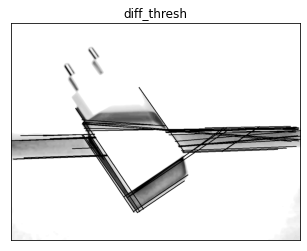

In [9]:
frame_gray_copy = res.copy()

edges = cv2.Canny(frame_gray_copy,5,15,apertureSize = 3, L2gradient = False)
lines = cv2.HoughLinesP(edges,1,np.pi/180,150,minLineLength=20,maxLineGap=100)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(frame_gray_copy,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(frame_gray_copy, cmap='gray', vmin=0)
plt.title('diff_thresh'), plt.xticks([]), plt.yticks([])
plt.show()